📌 **California Housing Prices Prediction Project**
1. Project Overview

Objective: Build a machine learning model to predict house prices in California.

Dataset: California Housing dataset (sklearn.datasets.fetch_california_housing).

Workflow:
- Data exploration (EDA).

- Data preprocessing.

- Train/Test split.

- Model building (using different algorithms).

- Model evaluation.

- Hyperparameter tuning.

- Final conclusions.

In [1]:
#Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
#Load the file
uploaded = files.upload()

Saving housing.csv to housing.csv


In [4]:
#load the dataset
df = pd.read_csv('housing.csv')
#Show first 10 rows
df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

 📌 **Basic information about the dataset**

In [5]:
print("Descriptive Statistics:")
df.describe(include='all')

Descriptive Statistics:


longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680       3.870671   
std         421.385070   1132.462122    382.329753       1.899822   
min           1.000000      3.000000      1.000000       0.499900   
25%         296.000000    787.000000    280.000000       2.563400   
50%         435.000000   1166.000000    409.000000       3.534800   
75%         647.000000   1725.000000    605.000000       4.743250   
max        6445.000000  35682.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
max          500001.000000             NaN

In [9]:
#Dataset Structure (rows,columns)
df.shape

(20640, 10)

In [11]:
# Info about datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
#Missing values in each column
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
#Drop missing values
df.dropna(inplace=True)

In [15]:
#Check on duplicated rows
df.duplicated().sum()

np.int64(0)

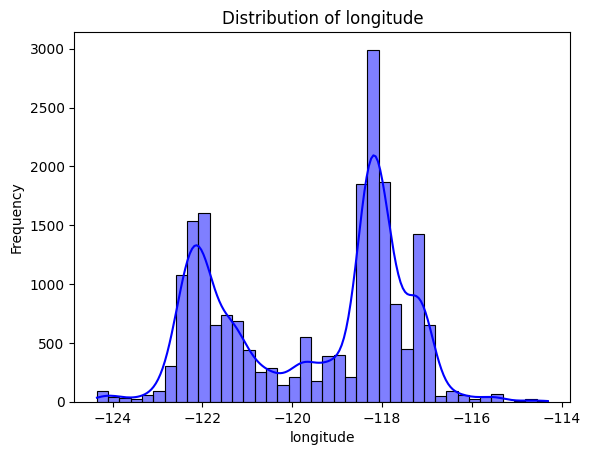

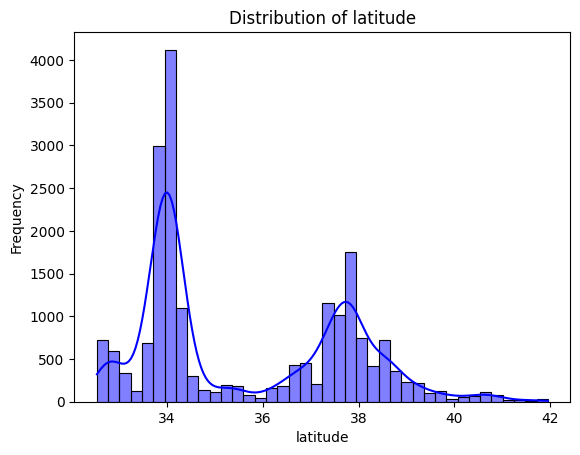

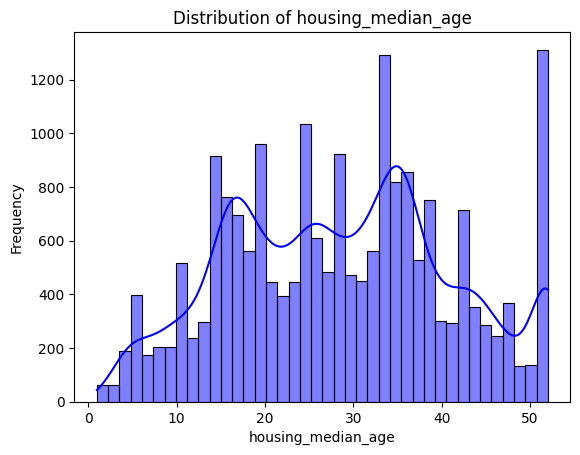

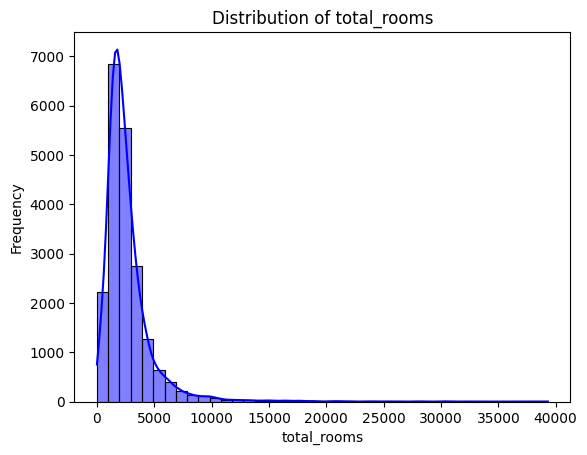

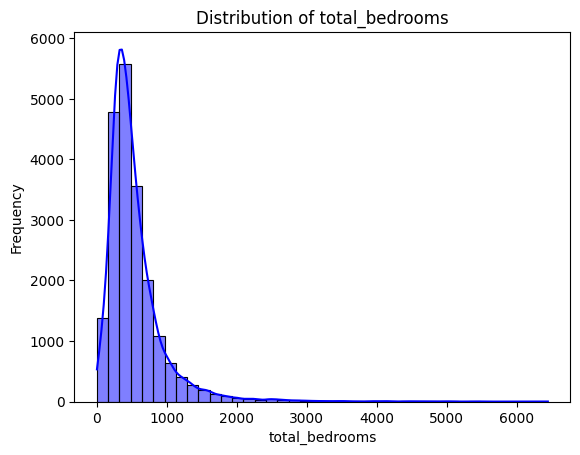

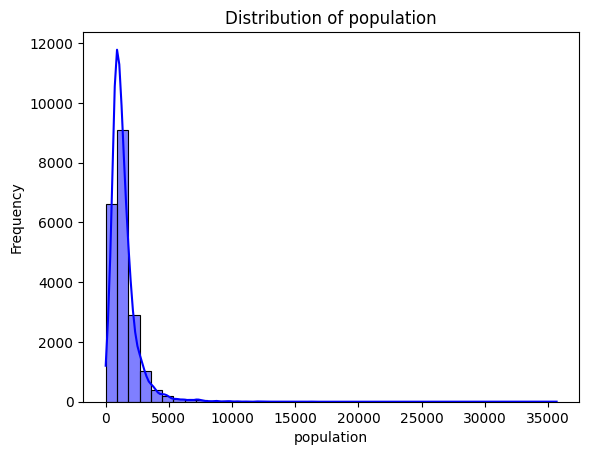

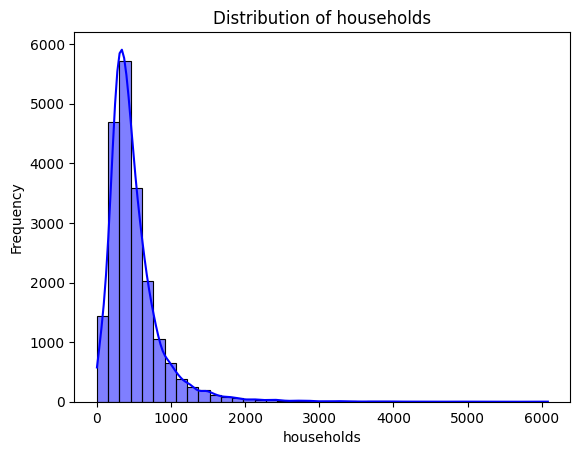

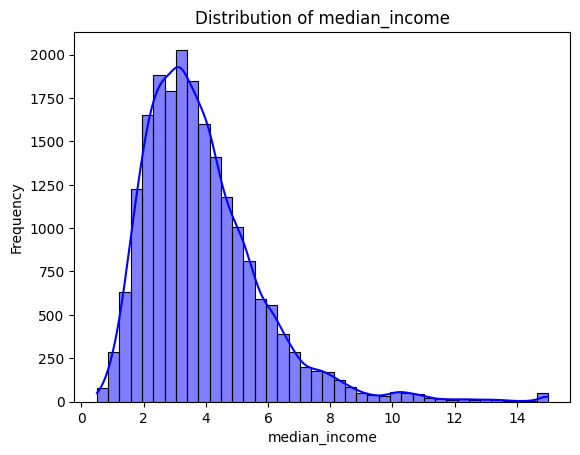

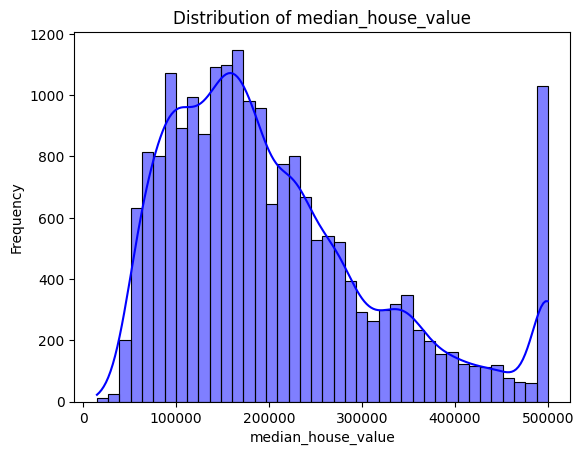

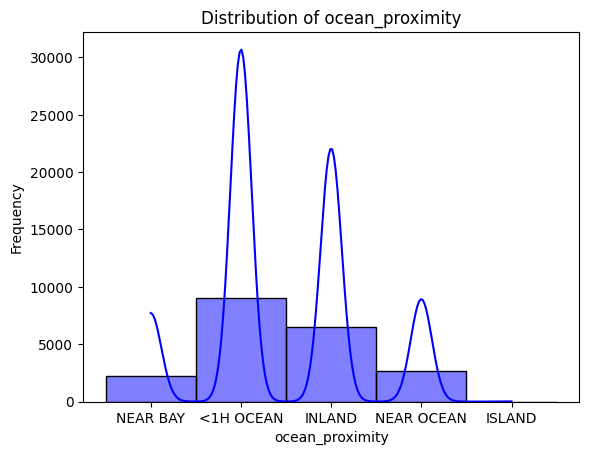

In [16]:
#Distribution of columns
for col in df:
    plt.Figure(figsize=(8,6))
    sns.histplot(df[col], bins=40, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel("Frequency")
    plt.show()

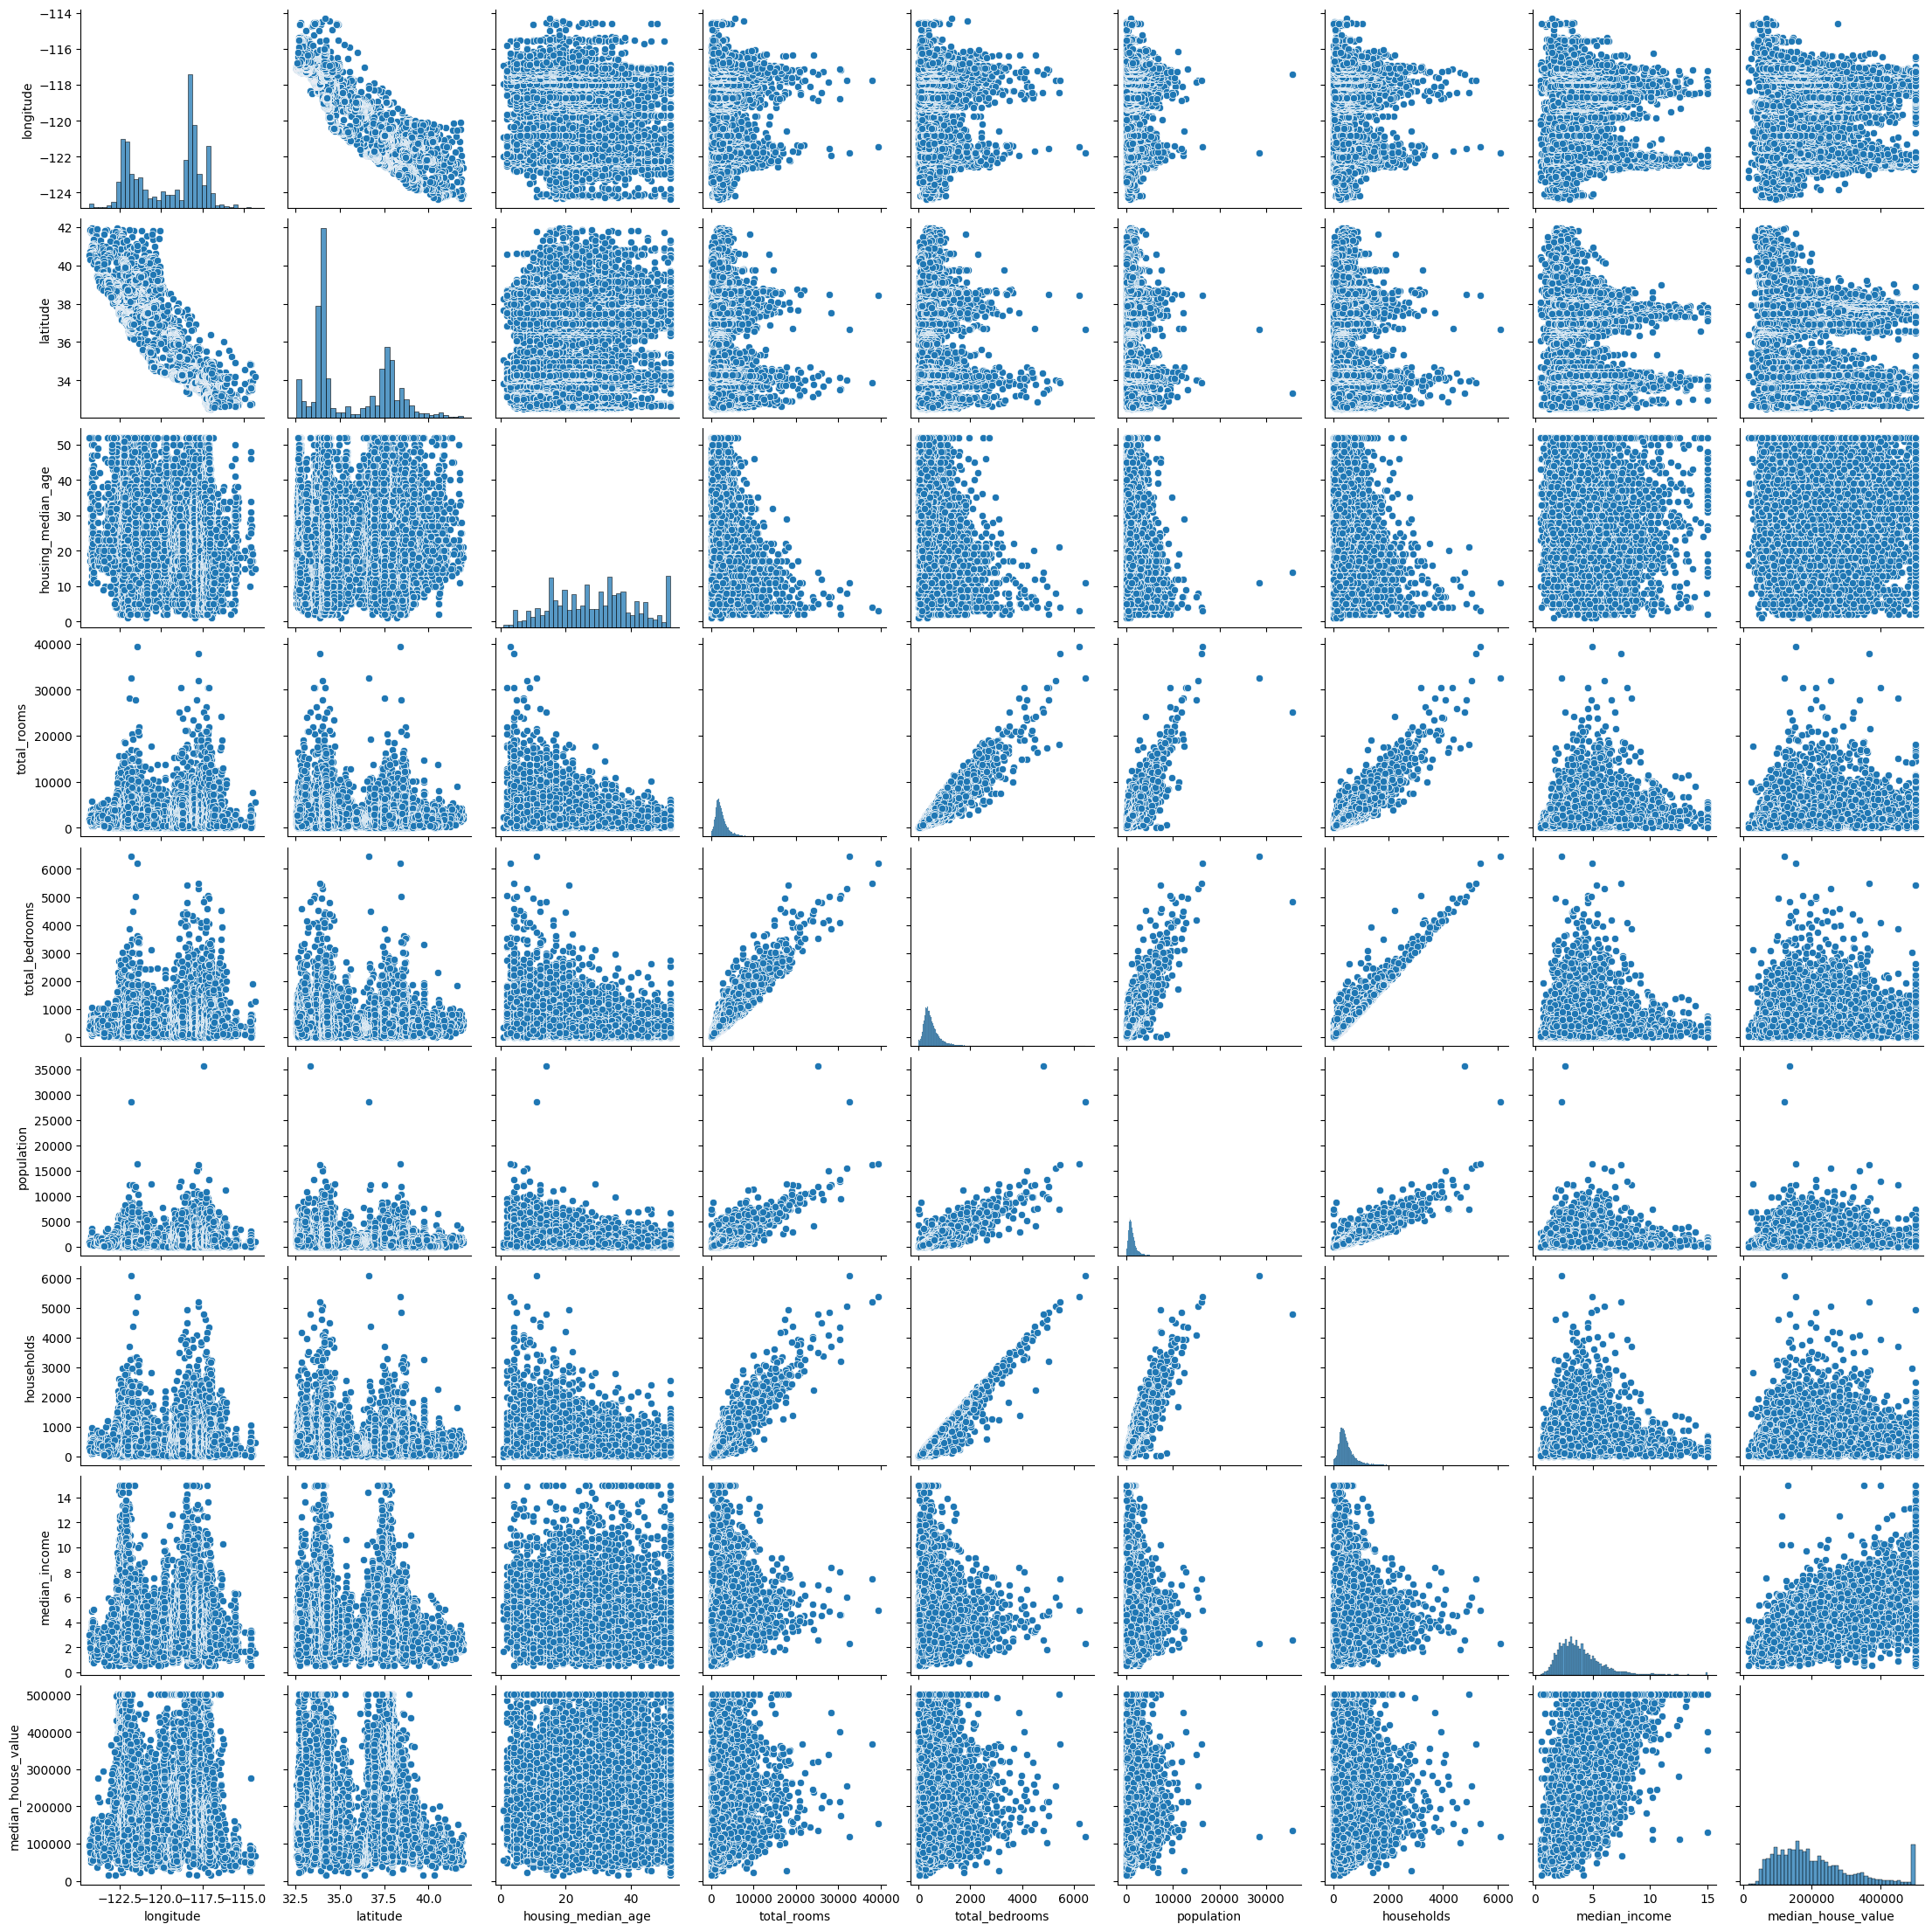

In [17]:
#Pairplot
sns.pairplot(df)
plt.show()

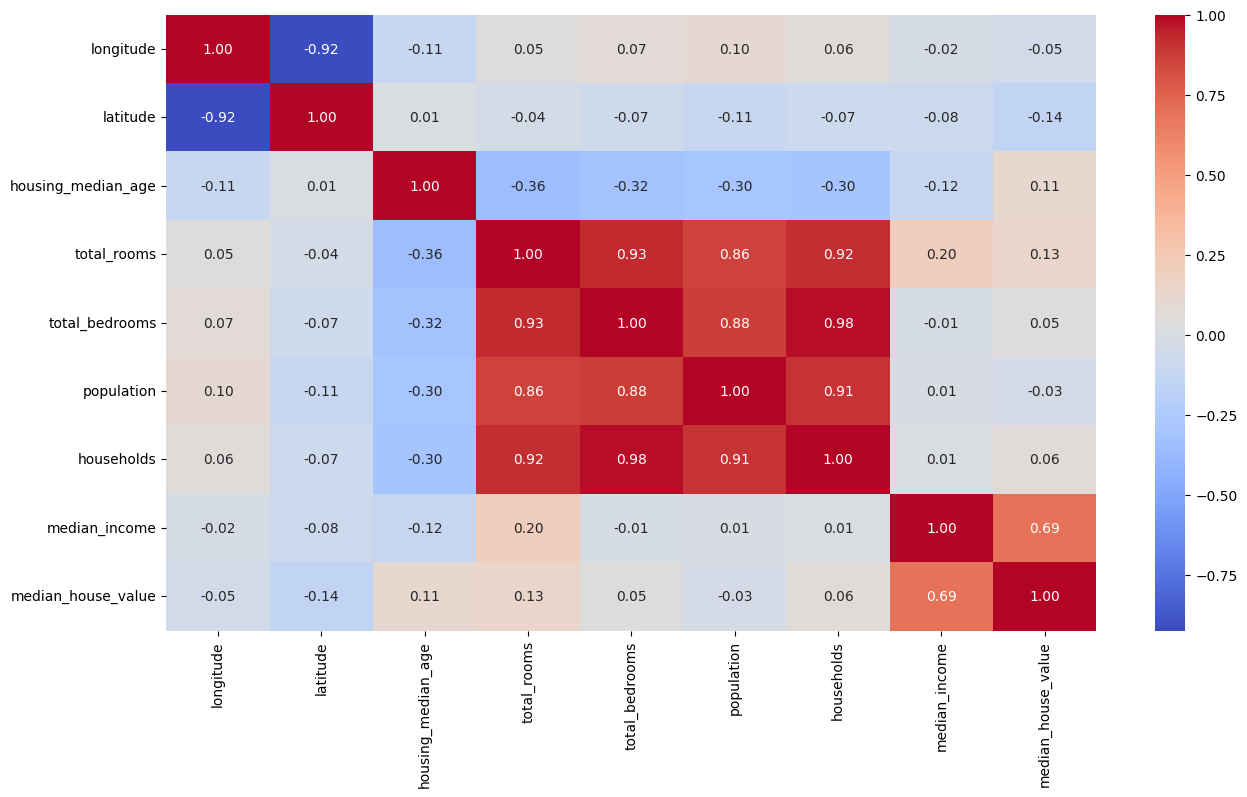

In [21]:
#Correlation heatmap

#Select numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr_mat = numeric_cols.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

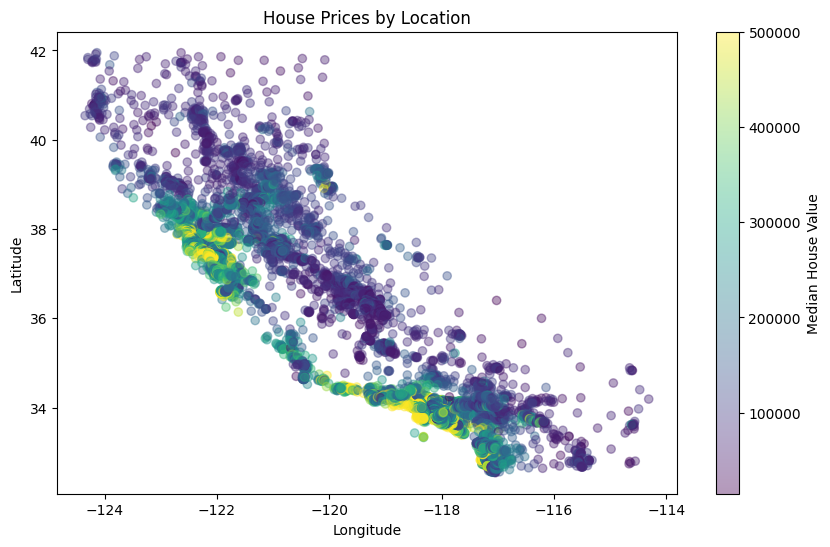

In [28]:
#Geographic Distribution
plt.figure(figsize=(10,6))
plt.scatter(df["longitude"], df["latitude"], c=df["median_house_value"],
            cmap="viridis", alpha=0.4)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Prices by Location")
plt.show()

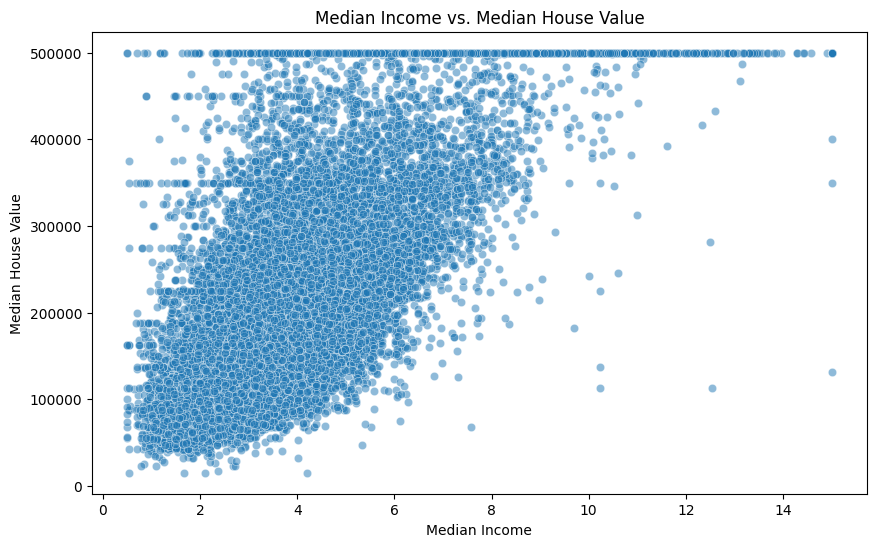

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='median_income',y='median_house_value',data=df,alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

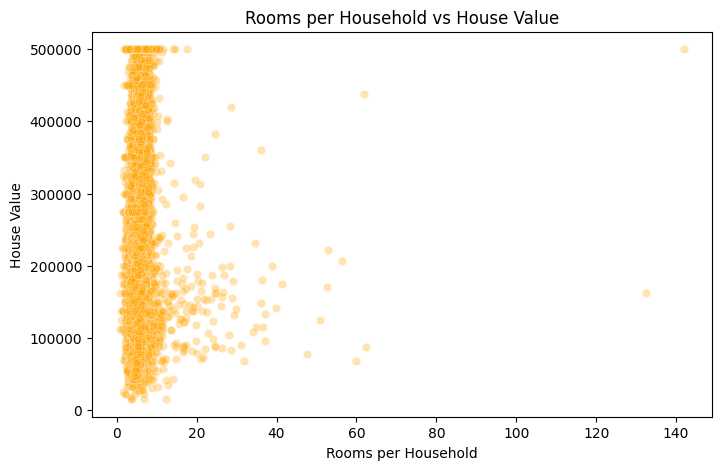

In [30]:
#Rooms per household
df["rooms_per_household"] = df["total_rooms"] / df["households"]

plt.figure(figsize=(8,5))
sns.scatterplot(x="rooms_per_household", y="median_house_value", data=df, alpha=0.3, color="orange")
plt.title("Rooms per Household vs House Value")
plt.xlabel("Rooms per Household")
plt.ylabel("House Value")
plt.show()

In [33]:
# Create new features
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [34]:
#Encoding the categorical columns (convert to numerical)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [35]:
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [37]:
#Define Features (X) and Target (y)
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [39]:
#Features (X) = all are features except house value
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity  \
0           322.0       126.0         8.3252                3   
1          2401.0      1138.0         8.3014                3   
2           496.0       177.0         7.2574                3   
3           558.0       219.0         5.6431                3   
4           565.0       259.0         3.8462                3   
...           ...         ...            ...              ...   
20635       845.0       330.0         1.5603                1   
20636       356.0       114.0         2.5568                1   
20637      1007.0       433.0         1.7000                1   
20638       741.0       349.0         1.8672                1   
20639      1387.0       530.0         2.3886                1   

       rooms_per_household  bedrooms_per_room  population_per_household  
0                 6.984127           0.146591                  2.555556  
1                 6.238137           0.155797                  2.109842  
2                 8.288136           0.129516                  2.802260  
3                 5.817352           0.184458                  2.547945  
4                 6.281853           0.172096                  2.181467  
...                    ...                ...                       ...  
20635             5.045455           0.224625                  2.560606  
20636             6.114035           0.215208                  3.122807  
20637             5.205543           0.215173                  2.325635  
20638             5.329513           0.219892                  2.123209  
20639             5.254717           0.221185                  2.616981  

[20433 rows x 12 columns]

In [40]:
#Target = median_house_value
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [42]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 42)

In [49]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [50]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  ocean_proximity  rooms_per_household  \
count        2.043300e+04     20433.000000         20433.000000   
mean         1.112777e-16         1.166153             5.431344   
std          1.000024e+00         1.420135             2.482946   
min         -1.662139e+00         0.000000             0.846154   
25%         -7.568419e-01         0.000000             4.441441   
50%         -2.353266e-01         1.000000             5.230769   
75%          5.010323e-01         1.000000             6.052381   
max          2.539456e+00         4.000000           141.909091   

       bedrooms_per_room  population_per_household  
count       20433.000000              20433.000000  
mean            0.213039                  3.071533  
std             0.057983                 10.438269  
min             0.100000                  0.692308  
25%             0.175427                  2.429032  
50%             0.203162                  2.817582  
75%             0.239821                  3.281513  
max             1.000000               1243.333333

In [56]:
print(f'Features_Train Shape: {x_train.shape}, Target_Train Shape: {y_train.shape}')
print(f'Features_Train Shape: {x_test.shape}, Target_Train Shape: {y_test.shape}')

Features_Train Shape: (16346, 12), Target_Train Shape: (16346,)
Features_Train Shape: (4087, 12), Target_Train Shape: (4087,)


In [57]:
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  \
0       322.0       126.0         8.3252            2.128819                3   
1      2401.0      1138.0         8.3014            1.313626                3   
2       496.0       177.0         7.2574            1.258183                3   
3       558.0       219.0         5.6431            1.164622                3   
4       565.0       259.0         3.8462            1.172418                3   

   rooms_per_household  bedrooms_per_room  population_per_household  
0             6.984127           0.146591                  2.555556  
1             6.238137           0.155797                  2.109842  
2             8.288136           0.129516                  2.802260  
3             5.817352           0.184458                  2.547945  
4             6.281853           0.172096                  2.181467

📌 **MODEL BUILDING**

In [58]:
#Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}
#Store results
results = {}

for name, model in models.items():
    #Train
    model.fit(x_train, y_train)

    #Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Train metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    #Test metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    #Results
    results[name] = {
        "Train_MSE": train_mse, "Train_RMSE": train_rmse, "Train_MAE": train_mae, "Train_R2": train_r2,
        "Test_MSE": test_mse, "Test_RMSE": test_rmse, "Test_MAE": test_mae, "Test_R2": test_r2
    }

#Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                      Train_MSE     Train_RMSE     Train_MAE  Train_R2  \
Linear Regression  4.672143e+09   68353.075544  49568.291997  0.647036   
Decision Tree      0.000000e+00       0.000000      0.000000  1.000000   
Random Forest      3.499223e+08   18706.211331  11985.559472  0.973565   
KNN                6.483258e+09   80518.682610  61911.620849  0.510212   
SVR                1.392430e+10  118001.250559  87905.396177 -0.051932   

                       Test_MSE      Test_RMSE      Test_MAE   Test_R2  
Linear Regression  4.864428e+09   69745.450569  50503.486316  0.644288  
Decision Tree      5.104653e+09   71446.853454  45288.614876  0.626721  
Random Forest      2.651602e+09   51493.709108  33280.016369  0.806101  
KNN                1.008311e+10  100414.687807  77426.771519  0.262671  
SVR                1.442244e+10  120093.453730  89955.847937 -0.054643  


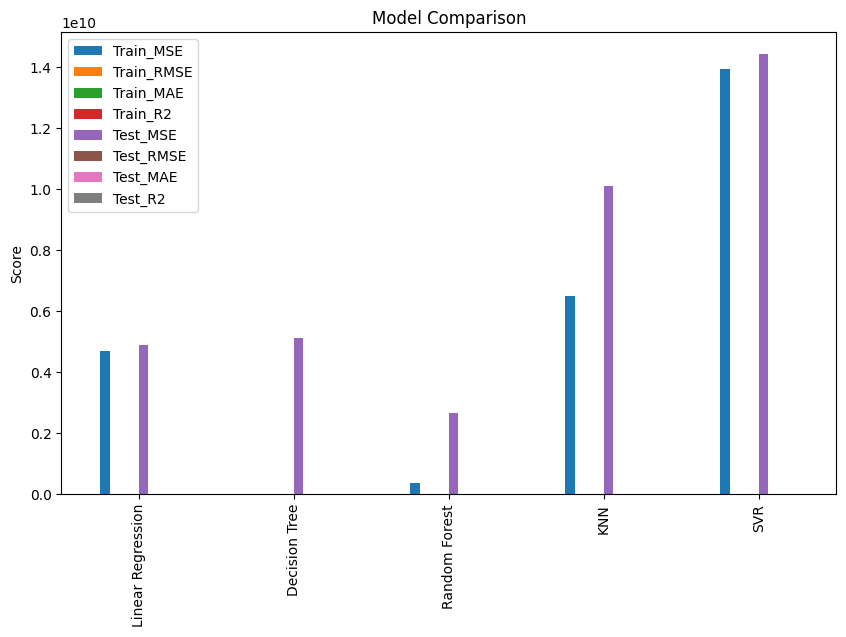

In [71]:
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()

**📌 Hyperparameter Tuning (Random Forest)**

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
rf = RandomForestRegressor(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
}
random_search = RandomizedSearchCV(estimator=rf,
    param_distributions=param_dist, n_iter=10, cv=3,
    verbose=2, random_state=42, n_jobs=-1,
    scoring="r2"
)

In [70]:
## Fit on training data
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='r2', verbose=2)

In [72]:
#Best Model
best_rf = random_search.best_estimator_

#On test data
y_pred = best_rf.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 33010.75484021677
R2: 0.8092708316706125


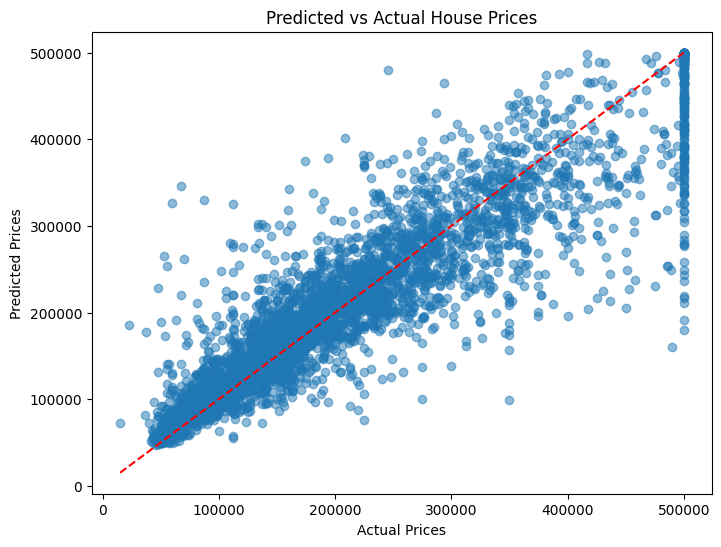

In [76]:
y_pred = best_rf.predict(x_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()

In [73]:
import joblib
joblib.dump(best_rf, "best_rf_model.pkl")

['best_rf_model.pkl']